# Aplicación de operaciones elementales
## Bibliotecas ocupadas
- **openCV:** Para la lectura de las imagenes
- **matplotlib.pyplot:** Para mostrar las imagenes y los graficos de histograma
- **numpy:** En varias de las funciones ocupadas
- **pandas:** Para el uso de dataframes para mostrar informacion comparativa
- **skimage.metrics**: Para la vision de datos estadisticos (MSE y SSIM) entre imagenes

In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse

---
## Parametros
- **image_path:** Ruta de la primera imagen
- **image_path_validation:** Ruta de la segunda
- **show_evolutions:** Activar para ver como evolucionan las imagenes durante el procesamiento, junto con su histograma por canal

In [2]:
image_path = '../dataset/VAR1.PNG'
image_path_validation = '../dataset/VAR2.PNG'
show_evolutions = False

---
## Funciones Utilizadas
- Lectura de imagen
- Funcion de potencia
- Funcion de histograma
- Funcion de suma
- Ver imagen y grafica de histograma
- Algoritmo de procesamiento de imagenes para solventar el problema planteado

In [3]:
def read_img(url):
    """
    Metodo que carga la imagen.
    Parameters
    ----------
    url : string 
        ruta donde se encuentra la imagen.
    Returns
    ----------
    Retorna la imagen en formato RGB
    """
    image = cv2.imread(url,cv2.IMREAD_UNCHANGED)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


def get_img_pow(image,y=1):
    """
    Metodo que aplica un filtro de potencia a la imagen.
    Parameters
    ----------
    image: numpy.array
        imagen a aplicar el filtro
    y: float
        valor gamma a aplicar a las imagenes
    Returns
    ----------
    Retorna la imagen con el filtro de potencia aplicado.
    """
    gamma =((image/255) **y)
    return np.uint8( gamma * 255 )

def get_img_hist(image):
    """
    Metodo que aplica un filtro de histograma a la imagen.
    Parameters
    ----------
    image: numpy.array
        imagen a aplicar el filtro
    Returns
    ----------
    Retorna la imagen con el filtro de histograma aplicado.
    """
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    image[:,:,0] = cv2.equalizeHist(image[:,:,0])
    image = cv2.cvtColor(image, cv2.COLOR_YUV2RGB)
    return image

def get_img_average(images):
    """
    Metodo que aplica un filtro de promedio a la imagen.
    Parameters
    ----------
    image: List[numpy.array]
        arreglo de imagenes a promediar
    Returns
    ----------
    Retorna una imagen obtenido del promedio de las imagenes de entrada.
    """
    img_sum = np.zeros(images[0].shape, dtype = int)
    for img in images:
        img_sum += img
    img_sum = np.uint8(img_sum/len(images))
    return img_sum

def show_evolution(image,title=""):
    """
    Metodo que muestra la imagen y el Histograma de este para cada canal que posee.
    Parameters
    ----------
    image: numpy.array
        imagen a mostrar y graficar
    Returns
    ----------
    Vacio
    """
    color = ('r', 'g', 'b') 
    fig, axs = plt.subplots(1, 2,figsize=(13,13))
    axs[0].imshow(image)
    axs[0].set_title("Imagen")
    axs[0].set_ylabel(title)
    for i, col in enumerate(color): 
        histr = cv2.calcHist([image],[i], None,[256],[0, 256]) 
        axs[1].plot(histr, color = col) 
        axs[1].set_title("Histograma")
        axs[1].set_ylabel(title)
                 
def image_process(image,show_ev=False,gamma =1.2):
    """
    Metodo que procesa con el algoritmo definido por el grupo
    la imagen entregada.
    Parameters
    ----------
    images : numpy.array 
        Imagen a procesar
    show_evolution: boolean
        Muestra la evolucion de la imagen mientras se aplica.
    metadata : list = None
        Lista con los titulos de cada una de las imagenes
    Returns
    -------
    La imagen procesadas
    """
    
    if show_ev: show_evolution(image,"Original")
    image_p = get_img_hist(image)
    if show_ev: show_evolution(image_p,"Paso 1:Histograma")
    image_p = get_img_pow(image_p,gamma)
    if show_ev: show_evolution(image_p,"Paso 2:Potencia")
    image_p = get_img_hist(image_p)
    if show_ev: show_evolution(image_p,"Paso3:Histograma")
    #generamos un arreglo con una ponderacion del 30% para la imagen inicial y un 70% para la imagen procesada
    average = [image]*3+[image_p]*7
    image_p = get_img_average(average)
    if show_ev: show_evolution(image_p,"Paso Final: Suma")
    return image_p

---
## Procesamiento
### Primera Imagen

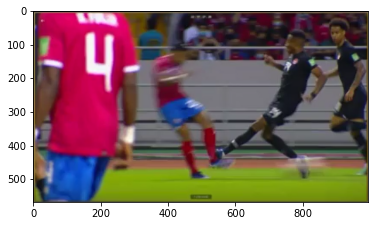

In [4]:
image_p = read_img(image_path)
plt.imshow(image_p)
image_p_processed = image_process(image_p,show_evolutions)

### Segunda Imagen

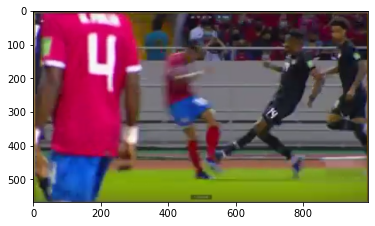

In [5]:
image_v = read_img(image_path_validation)
plt.imshow(image_v)
image_v_processed = image_process(image_v,show_evolutions)

---
## Resultados

In [6]:
#vemos si las imagenes son iguales
print("Imagenes")
df = pd.DataFrame()
df['Imagen'] = ['Prueba','Validacion']
df['Altura'] = [image_p.shape[0],image_v.shape[0]]
df['Anchura'] = [image_p.shape[1],image_v.shape[1]]
df['canales'] = [image_p.shape[2],image_v.shape[2]]
display (df)
if (image_p.shape == image_v.shape):
    print("Igualdad: ",ssim(image_p,image_v,multichannel=True))

print ("\nValores pos procesado:")    
#calculamos el SSIM y el MSE
ssim_1 = ssim(image_p,image_p_processed,multichannel=True)
mse_1 = mse(image_p,image_p_processed)
ssim_2 =ssim(image_v,image_v_processed,multichannel=True)
mse_2 = mse(image_v,image_v_processed)
#Generamos un dataFrame para mostrar los datos
df = pd.DataFrame()
df['Imagen'] = ['Prueba','Validacion']
df['MSE'] = [mse_1,mse_2]
df['SSIM'] = [ssim_1,ssim_2]
display (df)

Imagenes


Imagen  Altura  Anchura  canales
0      Prueba     567      995        3
1  Validacion     567      994        3


Valores pos procesado:


Imagen          MSE      SSIM
0      Prueba  1372.994076  0.819628
1  Validacion  1378.259961  0.823025

### Imagen de prueba

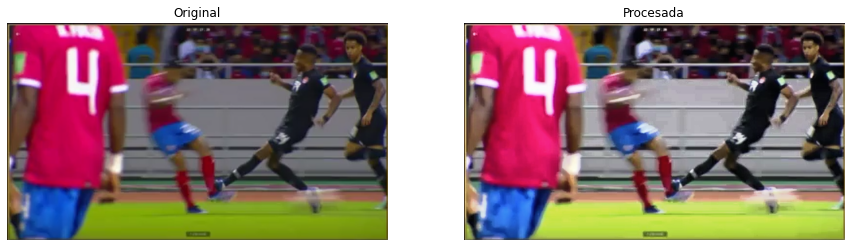

In [7]:
fig, axs = plt.subplots(1, 2,figsize=(15,15))
axs[0].set_title('Original')
axs[0].imshow(image_p)
axs[0].set_axis_off()
axs[1].set_title('Procesada')
axs[1].imshow(image_p_processed)
axs[1].set_axis_off()
plt.show()

### Imagen de validacion

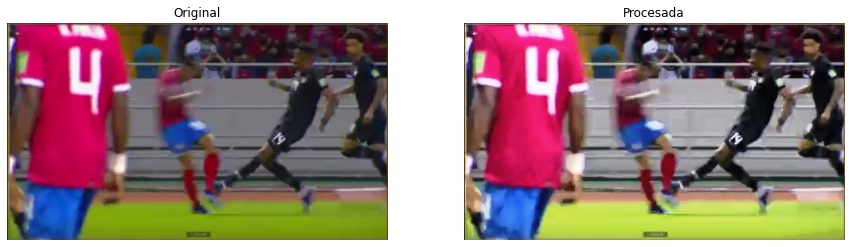

In [8]:
fig, axs = plt.subplots(1, 2,figsize=(15,15))
axs[0].set_title('Original')
axs[0].imshow(image_v)
axs[0].set_axis_off()
axs[1].set_title('Procesada')
axs[1].imshow(image_v_processed)
axs[1].set_axis_off()
plt.show()